##### Copyright 2019 The TensorFlow Authors.

# Convolutional Neural Network (CNN)

### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

import numpy as np

# custom made functions for this Machine Learning dataset
import customUtils as cu

# used for importing/exporting matlab data
from scipy.io import savemat
from scipy.io import loadmat

### Preparing the dataset

In [2]:
#import train data and correctly format images and labels for tensorflow
X, y_vec = cu.importImageTrainDataFromMatlab('dataset.mat', data_size=6500)
X = X / 255.0
train_images = np.reshape(X,(X.shape[0], 50, 50, 3))
y = np.zeros(y_vec.shape[0])
for j in range(y.shape[0]):
    y[j] = np.where(y_vec[j,:] == 1)[0][0]
train_labels = y.reshape(y.shape[0],1).astype(int)

X_test, y_test_vec = cu.importImageTestDataFromMatlab('dataset.mat', data_size=1625)
X_test = X_test / 255.0
test_images = np.reshape(X_test,(X_test.shape[0], 50, 50, 3))
y_test = np.zeros(y_test_vec.shape[0])
for j in range(y_test.shape[0]):
    y_test[j] = np.where(y_test_vec[j,:] == 1)[0][0]
test_labels = y_test.reshape(y_test.shape[0],1).astype(int)

### Verify the data

To verify that the dataset looks correct, let's plot the first image from every PCB class from the training set and display the class name below each image:


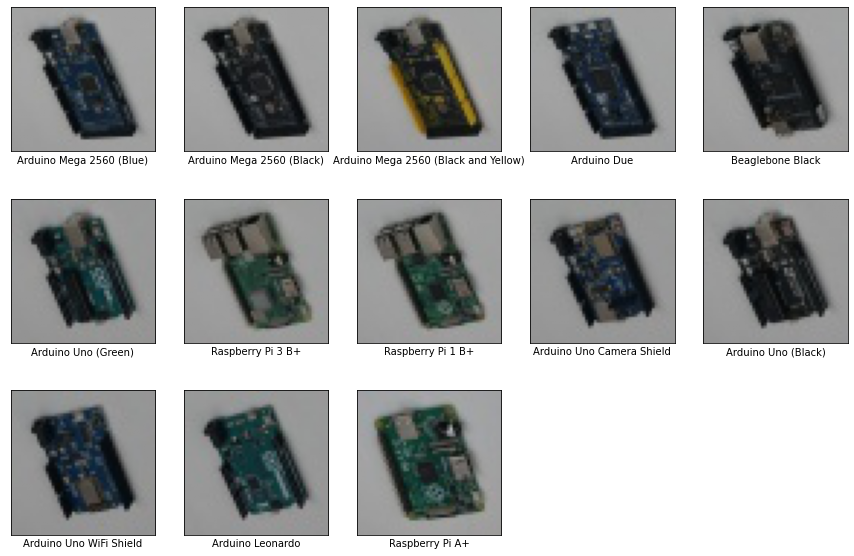

In [3]:
class_names = ['Arduino Mega 2560 (Blue)', 'Arduino Mega 2560 (Black)', 'Arduino Mega 2560 (Black and Yellow)',
               'Arduino Due','Beaglebone Black', 'Arduino Uno (Green)', 'Raspberry Pi 3 B+', 'Raspberry Pi 1 B+',
               'Arduino Uno Camera Shield', 'Arduino Uno (Black)', 'Arduino Uno WiFi Shield', 'Arduino Leonardo', 'Raspberry Pi A+']

plt.figure(figsize=(15,10))
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i*500])
    plt.xlabel(class_names[train_labels[i*500][0]])
plt.show()

### Create the convolutional base

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Dense part of the NN
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(13))

Here's the complete architecture of your model:

In [141]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 5184)            

### Compile and train the model

In [142]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
204/204 [==============================] - 17s 76ms/step - loss: 0.5036 - accuracy: 0.8380 - val_loss: 0.0445 - val_accuracy: 0.9920
Epoch 2/10
204/204 [==============================] - 15s 73ms/step - loss: 0.0116 - accuracy: 0.9974 - val_loss: 0.0102 - val_accuracy: 0.9988
Epoch 3/10
204/204 [==============================] - 15s 73ms/step - loss: 4.9660e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9994
Epoch 4/10
204/204 [==============================] - 15s 75ms/step - loss: 2.7721e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9994
Epoch 5/10
204/204 [==============================] - 15s 75ms/step - loss: 1.8364e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9982
Epoch 6/10
204/204 [==============================] - 16s 77ms/step - loss: 9.7790e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9969
Epoch 7/10
204/204 [==============================] - 15s 73ms/step - loss: 6.1082e-05 - accuracy: 1.0000 - val_loss: 0.

### Evaluate the model

51/51 - 1s - loss: 0.0039 - accuracy: 0.9994 - 1s/epoch - 20ms/step


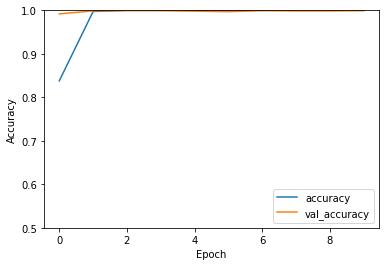

In [143]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [145]:
print(test_acc*100)

99.93846416473389
